# 2. Data Validatiom

In [1]:
import os

In [2]:
%pwd

'/Users/shiyu/Desktop/projects/1_MLOPs_projects/wine-quality-prediction/notebooks'

In [3]:
os.chdir("../")

In [4]:
%pwd

'/Users/shiyu/Desktop/projects/1_MLOPs_projects/wine-quality-prediction'

In [5]:
import pandas as pd

Following are the attributes we have at hand and a brief description on how important they may be to shape a wine's taste, aroma, and overall quality.

* Fixed Acidity: This feature describes the amount of fixed acids within the wine, such as tartaric and malic acid. These contribute to the taste and preservation of the wine.

* Volatile Acidity: This feature describes the amount of volatile acids in the wine, such as acetic acid. These acids may give an unpleasant taste and smell to the wine.

* Citric Acid: Citric acid is an organiz acid found in citrus fruits. It can add a tangy flavor to the wine.

* Residual Sugar: This feature describes the amount of unfermented sugar in the wine, which impacts the taste and sweetness of the wine.

* Chlorides: This feature describes the amount of salt present in the wine, which may also affect the tase.

* Free Sulfur Dioxide: This feature describes the sulfur dioxides that hasn't reacted to other components in the wine.

* Total Sulfur Dioxide: This feature describes the total amount of sulfur dioxide, including the free and bound forms.

* Density: The density of the wine describes a correlation between its alcoholic content and the types of grapes used to make the wine.

* pH: This feature is a measure of the acidity or basicity of the wine.

* Sulfates: A type of salt used for preservation in wine, which can also affect its taste.

* Alcohol: This feature describes the percentage of alcohol in the wine, which impacts its flavor and body.

* Quality: Target variable.

In [6]:
data = pd.read_csv("artifacts/data_ingestion/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.shape

(1599, 12)

In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## Exploratory Data Analysis

In [17]:
features = data.columns[:-1]
target = data.columns[-1]

features_variables = data[features]
target_variable = data[target]

In [20]:
features_variables.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90


In [31]:
target_variable.describe().round(2)

count    1599.00
mean        5.64
std         0.81
min         3.00
25%         5.00
50%         6.00
75%         6.00
max         8.00
Name: quality, dtype: float64

<Axes: >

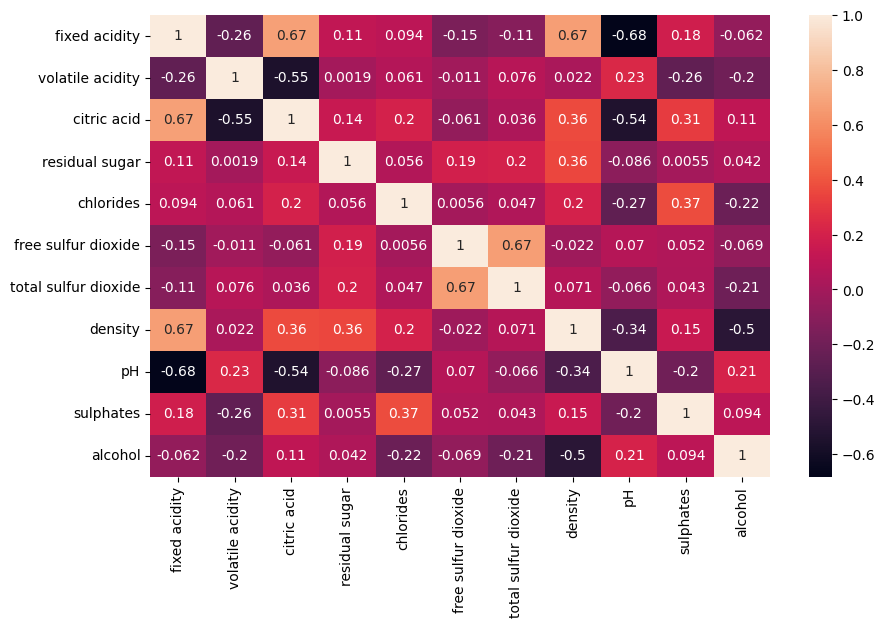

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(features_variables.corr(), annot=True)

From the correlation heatmap, the highest positive correlation is between **density** and **fixed acidity**, with 0.67 correlation. While the highest negative correlation is between **pH** and **fixed acidity**, with -0.68 correlation.

Text(0.5, 0, 'Quality')

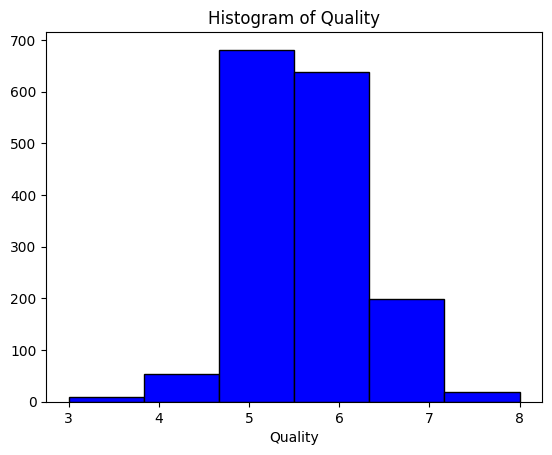

In [25]:
# plot histogram for quality
plt.hist(target_variable, bins=6, color='blue', edgecolor='black')
plt.title('Histogram of Quality')
plt.xlabel('Quality')

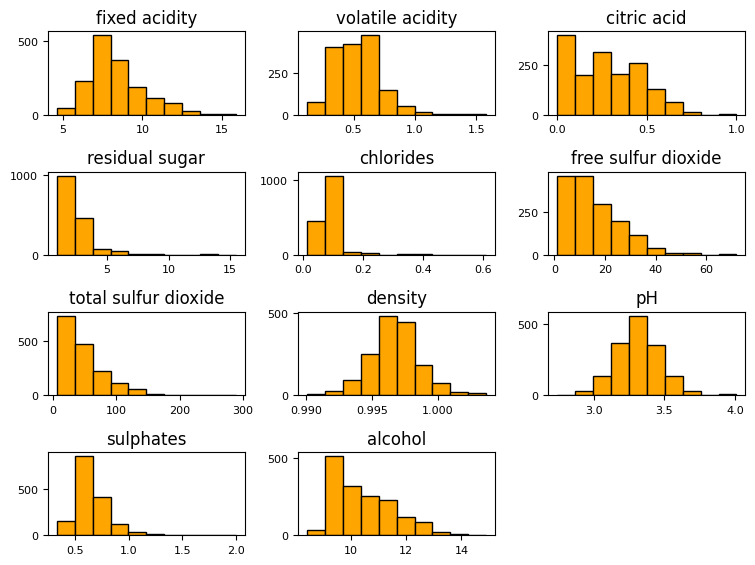

In [30]:
# plot histogram for features

features_variables.hist(bins=10, color='orange', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))


In [ ]:
# perform PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_variables)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_data['quality'] = target_variable


In [25]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [26]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [27]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [28]:
import os
from mlProject import logger

In [29]:
class DataValiadtion:
    def __init__(self, config: DataValidationConfig):
        self.config = config


    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)

            all_schema = self.config.all_schema.keys()

            
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e

In [30]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValiadtion(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-08-31 16:13:46,874: INFO: common: yaml file: config/config.yaml loaded successfully]
[2024-08-31 16:13:46,876: INFO: common: yaml file: params.yaml loaded successfully]
[2024-08-31 16:13:46,879: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-08-31 16:13:46,880: INFO: common: created directory at: artifacts]
[2024-08-31 16:13:46,880: INFO: common: created directory at: artifacts/data_validation]
